# Matplotlib

<center><h1 style="font_size:2em">Datos de libre acceso del Banco Mundial</center>

<img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px"/>

Indicadores de Desarrollo Económico: 
* https://datos.bancomundial.org/data-catalog/world-development-indicators

Este conjunto de datos del Banco Mundial contiene más de mil indicadores anuales del desarrollo económico de cientos de países de todo el mundo.

Conjunto de Datos:
* https://www.kaggle.com/worldbank/world-development-indicators

Descripción de los Datos:
* Indicadores: https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data
* Países: https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data



# Descarga de Datos
Fuente de los Datos: https://www.kaggle.com/worldbank/world-development-indicators

Descargar el fichero **world-development-indicators.zip** y descomprimir en el directorio de trabajo.

Creará los datos en un subdirectorio denominado: **'./world-development-indicators'**

# 2F3I7KW

# Exploración Inicial de Datos

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


## ¿Cuantos países?

In [4]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

## ¿Cuantos códigos de países?

In [5]:
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

## ¿Cuantos indicadores?

In [6]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

## ¿Cuantos años?

In [7]:
years = data['Year'].unique().tolist()
len(years)

56

## ¿Cual es el rango de años?

In [8]:
print(min(years)," to ",max(years))

1960  to  2015


# Visualización Básica

## Consultamos los códigos de paises

In [9]:
countryCodes = data['CountryCode'].unique()
print(countryCodes)

['ARB' 'CSS' 'CEB' 'EAS' 'EAP' 'EMU' 'ECS' 'ECA' 'EUU' 'FCS' 'HPC' 'HIC'
 'NOC' 'OEC' 'LCN' 'LAC' 'LDC' 'LMY' 'LIC' 'LMC' 'MEA' 'MNA' 'MIC' 'NAC'
 'OED' 'OSS' 'PSS' 'SST' 'SAS' 'SSF' 'SSA' 'UMC' 'WLD' 'AFG' 'ALB' 'DZA'
 'ASM' 'ADO' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT' 'AZE' 'BHS' 'BHR'
 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA'
 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN' 'CYM' 'CAF' 'TCD' 'CHI'
 'CHL' 'CHN' 'COL' 'COM' 'ZAR' 'COG' 'CRI' 'CIV' 'HRV' 'CUB' 'CUW' 'CYP'
 'CZE' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'ETH'
 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GRL'
 'GRD' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND'
 'IDN' 'IRN' 'IRQ' 'IRL' 'IMY' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN'
 'KIR' 'PRK' 'KOR' 'KSV' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY'
 'LIE' 'LTU' 'LUX' 'MAC' 'MKD' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MHL'
 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG' 'MNE' 'M


## Consultamos los indicadores

In [11]:
mask = data['IndicatorName'].str.contains('CO2')
indicators = data[mask]
print(indicators['IndicatorName'].head())

7                                    CO2 emissions (kt)
8                CO2 emissions (metric tons per capita)
9     CO2 emissions from gaseous fuel consumption (%...
10    CO2 emissions from liquid fuel consumption (% ...
11      CO2 emissions from liquid fuel consumption (kt)
Name: IndicatorName, dtype: object


## Seleccionamos un país y un indicador para explorar:

In [20]:
hist_indicator = 'CO2 emissions \(metric tons per capita\)'
hist_country = 'ESP'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

stage = data[mask1 & mask2]

In [21]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
19532,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.606593
45630,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,1.746222
73824,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.935782
102414,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,1.879509
131443,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,2.037725


In [22]:
stage.shape

(52, 6)

## ¿Cuál es la evolución de los valores de CO2 a lo largo del tiempo?

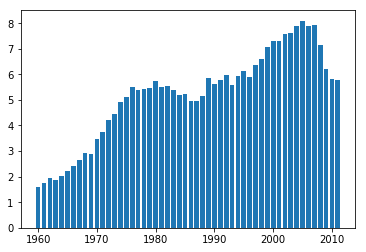

In [23]:
# Consultamos los años
years = stage['Year'].values
# Consultamos los valores de CO2
co2 = stage['Value'].values

# Creamos un Diagrama de Barras
plt.bar(years,co2)
plt.show()

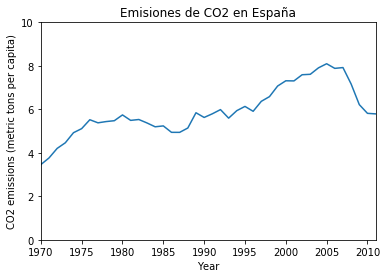

In [24]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('Emisiones de CO2 en España')
# Podemos seleccionar el rango de datos que queremos representar 
plt.axis([1970, 2011,0,10])

plt.show()

## ¿Cuál es la distribución de los valores?

In [25]:
# If you want to just include those within one standard deviation fo the mean, you could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values

In [26]:
print(len(hist_data))

52


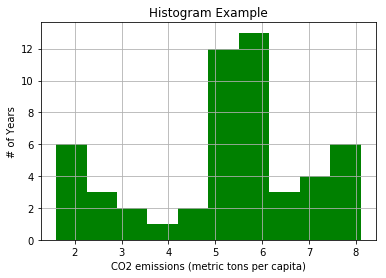

In [27]:
# the histogram of the data
plt.hist(hist_data, 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

### España ha producido entre 5 y 6 toneladas de CO2 per capita durante muchos años

## ¿Cómo se compara España con otros países?

In [28]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.count()

CountryName      232
CountryCode      232
IndicatorName    232
IndicatorCode    232
Year             232
Value            232
dtype: int64

In [30]:
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


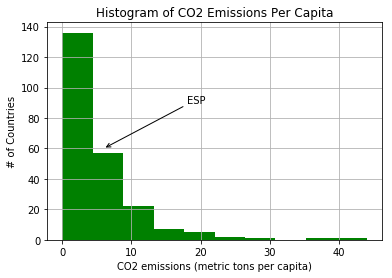

In [31]:
# Histograma con las emisiones per capita por país

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("ESP",
            xy=(6, 60), xycoords='data',
            xytext=(18, 90), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

### Relationship between GPD and CO2 Emissions in USA

## ¿Cuál es la evolución del PIB (GDP)?

In [32]:
# Seleccionamos Indicador y País
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'ESP'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# Consultamos los Datos aplicando los filtros definidos
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [34]:
# Consultamos los Datos
gdp_stage.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4996928,Spain,ESP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,26191.973878
5175157,Spain,ESP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,25838.057204
5350627,Spain,ESP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2012,25144.689659
5509941,Spain,ESP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2013,24805.424203
5625318,Spain,ESP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,25259.700580


In [35]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
19532,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.606593
45630,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,1.746222
73824,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.935782
102414,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,1.879509
131443,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,2.037725


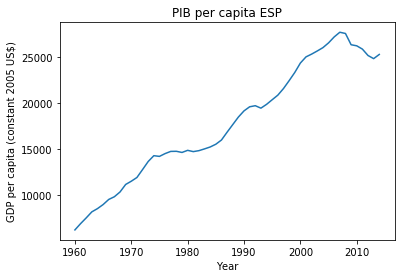

In [36]:
# Creamos un Diagrama
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Etiquetamos los ejes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

# Definimos el título del Diagrama
plt.title('PIB per capita ESP')

# Definimos los ejes del diagrama
#plt.axis([1959, 2011,0,25])

plt.show()

## ¿Cuál es la relación entre PIB y Emisiones de CO?

In [37]:
# Consultamos el Rango de Años con Datos Disponibles
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


In [38]:
# Tenemos que igualar el número de valores para crear un Diagrama de Dispersión
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


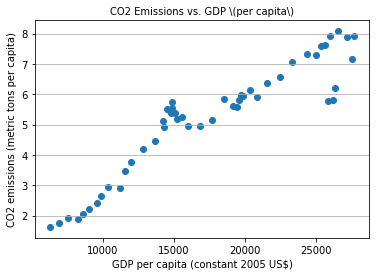

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

In [40]:
# Calculemos la Correlación entre PIB y Emisiones de CO2
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[ 1.        ,  0.92645763],
       [ 0.92645763,  1.        ]])

## Otros Ejemplos de Matplotlib

http://matplotlib.org/gallery.html
